
<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Exploring NSERC Awards Data


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1995 through 2016.

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html). This open Jupyter notebook is an instance of the Selecti

> **Acknowledgement:** I thank [Ian Allison](https://github.com/ianabc) and [James Colliander](http://colliand.com) of the [Pacific Institute for the Mathematical Sciences](http://www.pims.math.ca/) for building the [JupyterHub service](http://syzygy.ca) and for help with this notebook. -- I. Heisz

In [1]:
import numpy as np
import pandas as pd
import sys

df = pd.DataFrame()

startYear = 1995
endYear   = 2017  # The last year is not included, so if it was 2017 it means we include the 2016 collection but not 2017.

for year in range(startYear, endYear):
    file = 'https://s3.ca-central-1.amazonaws.com/open-data-ro/NSERC/NSERC_GRT_FYR' + str(year) + '_AWARD.csv.gz'
    df = df.append(pd.read_csv(file, 
                               compression='gzip', 
                               usecols = [1, 2, 3, 4, 5, 7, 9, 11, 12, 13, 17, 28], 
                               encoding='latin-1'
                              )
                  )  
    print(year)
 
## Rename columns for better readability.
df.columns = ['Name', 'Department', 'OrganizationID',
                 'Institution', 'ProvinceEN', 'CountryEN',
                 'FiscalYear', 'AwardAmount', 'ProgramID',
                 'ProgramNameEN', 'Committee', 'ResearchSubjectEN']

## Strip out any leading or trailing whitespace in the ProgramID column
df['ProgramID'] = df['ProgramID'].str.strip();

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


## Define Methods

In [2]:
import matplotlib.ticker as mtick
import plotly.graph_objs as go
!pip3 install plotly --user 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.tools as tls
import matplotlib.pylab as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def nsercPlot (data):
    fig, axes = plt.subplots()

    xAxis = 'FiscalYear'
    yAxis = 'AwardAmount'
    
    y = data.groupby(xAxis).sum()[yAxis]
    x = y.index
    
    plt.xlabel(xAxis, fontsize=14)
    plt.ylabel(yAxis, fontsize=14)
    plt.title(title)
      
    plt.plot(x,y)
    
    init_notebook_mode(connected=True)
    
    axes.scatter(x,y,s=plotPointSizes,alpha=opacity)
    canvas = FigureCanvas(fig)
    plotly_fig = tls.mpl_to_plotly(fig)
    py.iplot(plotly_fig)
    
    return;

def viewAvailableSearch(column, searchString):
    available = df.drop_duplicates(subset = column)
    available = available[available[column].str.contains(searchString, na=False)]
    sorted = available.sort_values(by=[column], ascending=[True])
    print(sorted.to_string(columns= [column], index=False))
    return;

def overview(column, data):
    mean = data[columnYouWantInformationOn].mean()
    print('The mean of ' + str(columnYouWantInformationOn) + ' is ' + str(mean))

    median = data[columnYouWantInformationOn].median()
    print('The median of ' + str(columnYouWantInformationOn) + ' is ' + str(median))

    standardDeviation = data[columnYouWantInformationOn].std()
    print('The standard deviation of ' + str(columnYouWantInformationOn) + ' is ' + str(standardDeviation))

    awardCount = data.AwardAmount.count()
    print('The total number of awards for your selection is ' + str(awardCount))
    return;

/bin/sh: 1: pip3: not found


## Engage Grants Program

In [3]:
selectedData = df
viewAvailableSearch('ProgramNameEN','nga')

ProgramNameEN
Engage Grants Program                         ...
Engage Plus Grants Program                    ...
                  Engage Plus Grants for Colleges
                  Engage Plus Grants for colleges


In [4]:
onlyEngageGrantsProgram = selectedData.loc[(selectedData['ProgramID'] == "RGPDD")]
onlyEngageGrantsProgram

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
19992,"Hirst, Graeme",Computer and Mathematical Sciences (Scarborough),31,University of Toronto,Ontario,CANADA,2013,39250,RGPDD,Discovery Frontiers - Digging into Data ...,1580,Not available
19996,"Cheriet, Mohamed",Génie de la production automatisée,53,École de technologie supérieure,Québec,CANADA,2013,62500,RGPDD,Discovery Frontiers - Digging into Data ...,1580,Not available
20032,"Milios, Evangelos","Computer Science, Faculty of",79,Dalhousie University,Nova Scotia,CANADA,2013,70000,RGPDD,Discovery Frontiers - Digging into Data ...,1580,Not available
3831,"Cheriet, Mohamed",Génie de la production automatisée,53,École de technologie supérieure,Québec,CANADA,2014,62500,RGPDD,Discovery Frontiers - Digging into Data ...,1580,Not available
9414,"Hirst, Graeme",Computer and Mathematical Sciences (Scarborough),31,University of Toronto,Ontario,CANADA,2014,41500,RGPDD,Discovery Frontiers - Digging into Data ...,1580,Not available
14918,"Milios, Evangelos","Computer Science, Faculty of",79,Dalhousie University,Nova Scotia,CANADA,2014,55000,RGPDD,Discovery Frontiers - Digging into Data ...,1580,Not available
9744,"Hoey, Jesse","Computer Science, David R. Cheriton School of",33,University of Waterloo,Ontario,CANADA,2016,26050,RGPDD,Discovery Frontiers - Digging into Data ...,1580,Not available
19373,"Rudzicz, Frank",Computer Science (St. George Campus),31,University of Toronto,Ontario,CANADA,2016,14000,RGPDD,Discovery Frontiers - Digging into Data ...,1580,Not available
20956,"Sonderegger, Morgan",Linguistics,61,McGill University,Québec,CANADA,2016,40211,RGPDD,Discovery Frontiers - Digging into Data ...,1580,Not available


In [5]:
onlyEngageGrantsProgram['AwardAmount'].sum()

411011

In [6]:
title = 'Collaborative Research and Development Grants Awards over Time'
plotPointSizes = 7 
opacity = 1

nsercPlot(onlyEngageGrantsProgram)

/home/jcollian/.local/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:516: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.



## Engage Grants and Related Program Awards
Includes Engage Grants, Engage Plus Grants and Engage Plus Grants for colleges.

In [7]:
allRelatedPrograms = selectedData

allRelatedPrograms = allRelatedPrograms.loc[(allRelatedPrograms['ProgramID'] == "EGP") | (allRelatedPrograms['ProgramID'] == "EGP2") | (allRelatedPrograms['ProgramID'] == "CEGP2")]

allRelatedPrograms

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
1003,"Bahrami, Majid","Engineering Science, School of",5,Simon Fraser University,British Columbia,CANADA,2009,25000,EGP,Engage Grants Program ...,1554,Mechanical engineering
1325,"Bassi, Amarjeet",Chemical and Biochemical Engineering,36,University of Western Ontario,Ontario,CANADA,2009,25000,EGP,Engage Grants Program ...,1553,Biochemical engineering
1664,"Bengio, Yoshua",Informatique et recherche opérationnelle,63,Université de Montréal,Québec,CANADA,2009,25000,EGP,Engage Grants Program ...,1552,Learning and inference theories
1726,"Benzaazoua, Mostafa",Sciences appliquées,47,Université du Québec en Abitibi-Témiscamingue,Québec,CANADA,2009,23400,EGP,Engage Grants Program ...,1552,Mining and mineral processing
1927,"Bhattacharjee, Subir",Mechanical Engineering,9,University of Alberta,Alberta,CANADA,2009,25000,EGP,Engage Grants Program ...,1555,Rheology and processing
3091,"Butler, Michael",Microbiology,19,University of Manitoba,Manitoba,CANADA,2009,25000,EGP,Engage Grants Program ...,1555,Biochemical engineering
3173,"Callaghan, Jack",Kinesiology,33,University of Waterloo,Ontario,CANADA,2009,24548,EGP,Engage Grants Program ...,1553,Human factors engineering
3478,"Cercone, Nick","Science and Engineering , Faculty of",38,York University,Ontario,CANADA,2009,25000,EGP,Engage Grants Program ...,1553,Software and development
3924,"Cheng, Yufeng(Frank)",Mechanical and Manufacturing Engineering,11,University of Calgary,Alberta,CANADA,2009,20200,EGP,Engage Grants Program ...,1555,"Materials structure, properties and testing"
4491,"Coops, Nicholas",Forest Resources Management,2,University of British Columbia,British Columbia,CANADA,2009,24500,EGP,Engage Grants Program ...,1554,Renewable and non-renewable resources management


In [8]:
title = 'Engage Grants and Related Program Awards over Time'
plotPointSizes = 7 
opacity = 1

nsercPlot(allRelatedPrograms)

In [ ]:
allRelatedPrograms = selectedData

allRelatedPrograms = allRelatedPrograms.loc[(allRelatedPrograms['ProgramID'] == "EGP") | (allRelatedPrograms['ProgramID'] == "EGP2") | (allRelatedPrograms['ProgramID'] == "CEGP2")]

allRelatedPrograms

In [9]:
selectedData

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
0,"Aarssen, Lonnie",Biology,29,Queen's University,Ontario,CANADA,1995,41400,RGPIN,Discovery Grants Program - Individual,18,Terrestrial ecology
1,"Abbott, Harvey",Mathematical Sciences,9,University of Alberta,Alberta,CANADA,1995,14000,RGPIN,Discovery Grants Program - Individual,16,Combinatorics
2,"Abbott, Sean",Biological Sciences,9,University of Alberta,Alberta,CANADA,1995,5755,PGS,Postgraduate Scholarships,147,"Taxonomy, systematics and phylogenetics"
3,"Abcarius, John",Electrical Engineering,61,McGill University,Québec,CANADA,1995,10380,PGS,Postgraduate Scholarships,146,Integrated circuits
4,"Abcarius, Nicole",Head Office,7341,GE Glegg Water Technologies Inc.,Ontario,CANADA,1995,3600,URI,Industrial Undergraduate Student Research Awards,146,Operations research and management science
5,"Abdalla, Hany",Civil Engineering,70,Concordia University,Québec,CANADA,1995,20985,PDF,Postdoctoral Fellowships,146,Structural engineering
6,"AbdelAziz, Alaa",Chemistry,21,University of Winnipeg,Manitoba,CANADA,1995,32264,RGPIN,Discovery Grants Program - Individual,24,Metal and organometallic chemistry
7,"AbdElHalim, Omar",Civil and Environmental Engineering,23,Carleton University,Ontario,CANADA,1995,20000,RGPIN,Discovery Grants Program - Individual,6,Structural materials
8,"AbdelRahman, AbdelFattah",Geology,70,Concordia University,Québec,CANADA,1995,15000,RGPIN,Discovery Grants Program - Individual,8,"Petrology, igneous and metamorphic geology"
9,"Abdelrahman, Tarek",Electrical and Computer Eng.,31,University of Toronto,Ontario,CANADA,1995,9500,RGPIN,Discovery Grants Program - Individual,7,Software and development


In [10]:
DiscoveryPrograms = selectedData

DiscoveryPrograms = DiscoveryPrograms.loc[(DiscoveryPrograms['ProgramNameEN'].str.contains("iscovery"))]

In [11]:
DiscoveryPrograms

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
0,"Aarssen, Lonnie",Biology,29,Queen's University,Ontario,CANADA,1995,41400,RGPIN,Discovery Grants Program - Individual,18,Terrestrial ecology
1,"Abbott, Harvey",Mathematical Sciences,9,University of Alberta,Alberta,CANADA,1995,14000,RGPIN,Discovery Grants Program - Individual,16,Combinatorics
6,"AbdelAziz, Alaa",Chemistry,21,University of Winnipeg,Manitoba,CANADA,1995,32264,RGPIN,Discovery Grants Program - Individual,24,Metal and organometallic chemistry
7,"AbdElHalim, Omar",Civil and Environmental Engineering,23,Carleton University,Ontario,CANADA,1995,20000,RGPIN,Discovery Grants Program - Individual,6,Structural materials
8,"AbdelRahman, AbdelFattah",Geology,70,Concordia University,Québec,CANADA,1995,15000,RGPIN,Discovery Grants Program - Individual,8,"Petrology, igneous and metamorphic geology"
9,"Abdelrahman, Tarek",Electrical and Computer Eng.,31,University of Toronto,Ontario,CANADA,1995,9500,RGPIN,Discovery Grants Program - Individual,7,Software and development
10,"AbdelSayed, George",Civil and Environmental Engineering,37,University of Windsor,Ontario,CANADA,1995,15000,RGPIN,Discovery Grants Program - Individual,6,Structural analysis
11,"Abdous, Belkacem",Mathématiques et informatique,59,Université du Québec à Trois-Rivières,Québec,CANADA,1995,10000,RGPIN,Discovery Grants Program - Individual,14,Nonparametric inference
20,"AbouHaidar, Mounir",Botany,31,University of Toronto,Ontario,CANADA,1995,49000,RGPIN,Discovery Grants Program - Individual,32,Not available
22,"Aboulazm, Azmy",Ocean Sciences Centre,89,Memorial University of Newfoundland,Newfoundland and Labrador,CANADA,1995,16000,RGPIN,Discovery Grants Program - Individual,13,Offshore engineering


In [12]:
title = 'Discovery Program vs. Time'
plotPointSizes = 7 
opacity = 1

nsercPlot(DiscoveryPrograms)

In [13]:
selectedData['Committee'].unique()

array([  18,   16,  147,  146,   24,    6,    8,    7,   14,  166,  148,
         32,   13,  334,  141,    9,   12,   21,  230,    3,  337,   26,
        335,   30,  150,   31,  240,   28,   29,  106,  800,  215,    4,
        336,  105,  173,  200,  171,  172,   20,  225,  245,   19,  220,
         33,   17,  210,  199,  142,  170,  131,  235,  104,  127,  205,
         90,   43,   34,   63,  250,   66,   11,    2,   86,   85,   81,
         87,   84,   83,   40,  183,  184,  186,  158,  188,  187,  185,
        143,   92,  341,  350,  181,   93,  101,   82,  160,   96,   95,
        159,  149,  996,  997,  354,  135,  180,  362,   99,  103,  330,
        352,  361,  359,  364,  331,  360,  353,  370, 9998,  155,  366,
        368,  367, 1001,  369, 1003, 1006, 1002, 1015, 1011, 1005, 1004,
       1009, 1014, 1017, 1016, 1018, 1024, 1007, 1019, 1025, 1029, 1028,
       1026,  176,  175,  178,  177,  179, 1038, 1032, 1036, 1031, 1030,
       1027, 1039, 1053, 1050, 1054, 1040, 1042, 10

In [30]:
section1508 = selectedData.loc[(selectedData['Committee'] == 1508)]

In [39]:
section1508.loc[section1508['Name'].str.contains("Adem")]

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
140,"Adem, Alejandro",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,40000,RGPIN,Discovery Grants Program - Individual,1508,Algebraic topology
139,"Adem, Alejandro",Mathematics,2,University of British Columbia,British Columbia,CANADA,2011,40000,RGPIN,Discovery Grants Program - Individual,1508,Algebraic topology
154,"Adem, Alejandro",Mathematics,2,University of British Columbia,British Columbia,CANADA,2012,40000,RGPIN,Discovery Grants Program - Individual,1508,Algebraic topology
6035,"Adem, Alejandro",Mathematics,2,University of British Columbia,British Columbia,CANADA,2013,40000,RGPIN,Discovery Grants Program - Individual,1508,Algebraic topology
142,"Adem, Alejandro",Mathematics,2,University of British Columbia,British Columbia,CANADA,2014,40000,RGPIN,Discovery Grants Program - Individual,1508,Algebraic topology
153,"Adem, Alejandro",Mathematics - Mathematics,2,University of British Columbia,British Columbia,CANADA,2015,31000,RGPIN,Discovery Grants Program - Individual,1508,Algebraic topology
171,"Adem, Alejandro",Mathematics - Mathematics,2,University of British Columbia,British Columbia,CANADA,2016,31000,RGPIN,Discovery Grants Program - Individual,1508,Algebraic topology


In [22]:
title = '1508 vs. Time'
plotPointSizes = 7 
opacity = 1

nsercPlot(section1508)

![](https://wwejubwfy.s3.amazonaws.com/NSERC_-_Selection_Committees_and_Evaluation_Groups_2018-04-12_14-37-32.png)

In [24]:
EvaluationGroups = selectedData.loc[(selectedData['Committee']==1501) 
                                   | (selectedData['Committee']==1502)
                                   | (selectedData['Committee']==1503)
                                   | (selectedData['Committee']==1504) 
                                   | (selectedData['Committee']==1505)
                                   | (selectedData['Committee']==1506)
                                   | (selectedData['Committee']==1507)
                                   | (selectedData['Committee']==1508)
                                   | (selectedData['Committee']==1509)
                                   | (selectedData['Committee']==1510)
                                   | (selectedData['Committee']==1511)
                                   | (selectedData['Committee']==1512)]

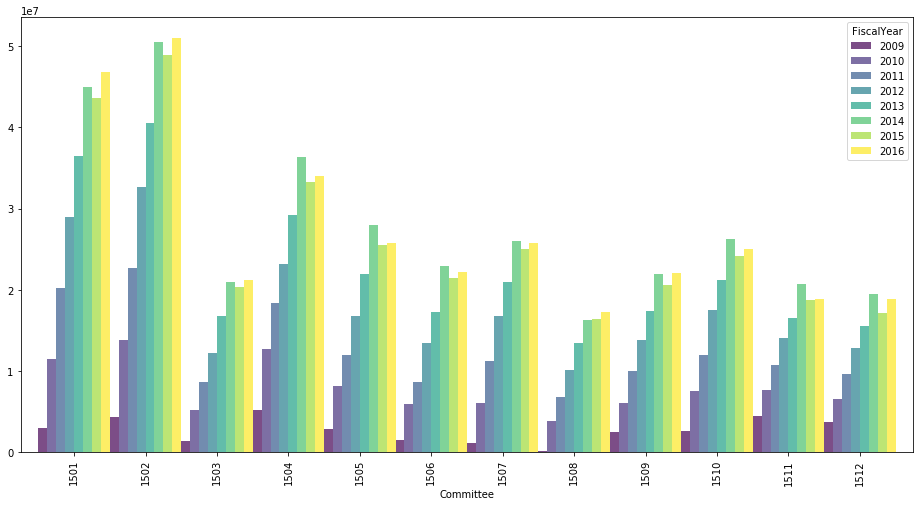

In [40]:
## Revenue by Year for all Institutions
(EvaluationGroups.groupby(['Committee','FiscalYear']).sum()['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1)

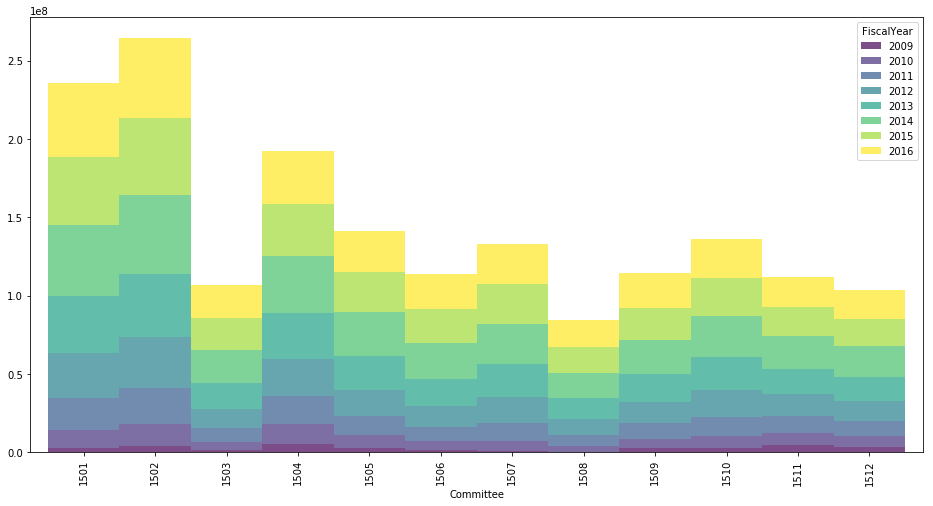

In [41]:
(EvaluationGroups.groupby(['Committee','FiscalYear']).sum()['AwardAmount'].unstack()).plot(
    kind="bar", stacked=True, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1)

In [43]:
len(selectedData)

457896

In [44]:
len(EvaluationGroups)

49532

In [55]:
ctrms = selectedData.loc[selectedData['ProgramID'] == 'CTRMS']

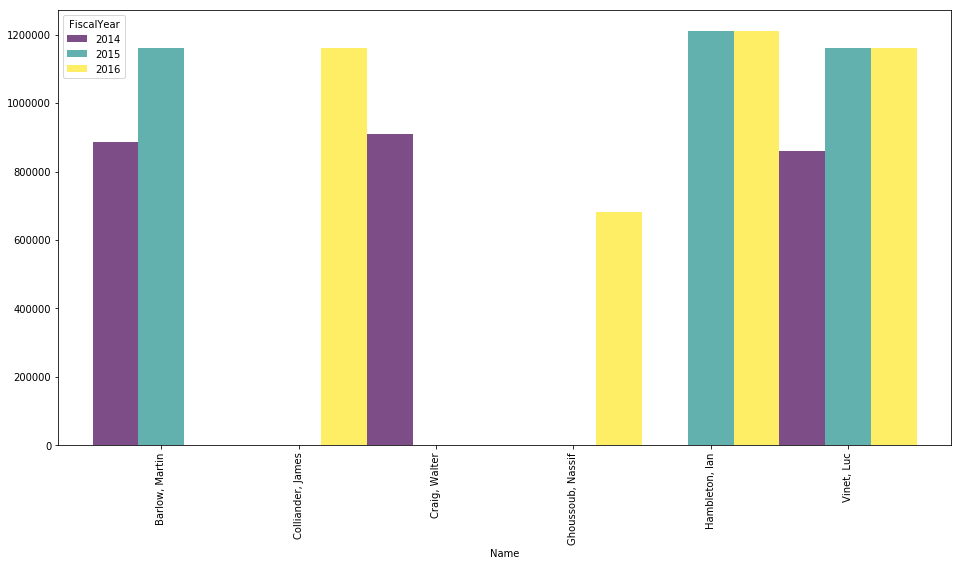

In [65]:
(ctrms.groupby(['Name','FiscalYear']).sum()['AwardAmount'].unstack()).plot(
    kind="bar", stacked=False, cmap="viridis", alpha=0.7, figsize=(16, 8), width=1)

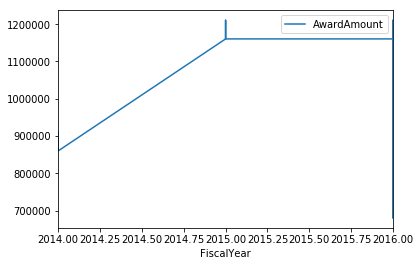

In [66]:
ctrms

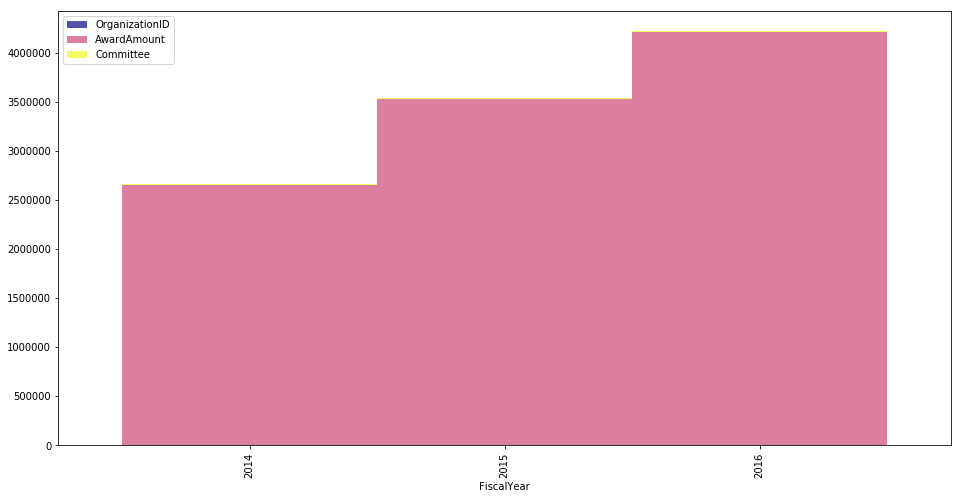

In [68]:
ctrms.groupby('FiscalYear').sum().plot(kind='bar', stacked=True, 
            cmap="plasma", alpha=0.7, figsize=(16, 8), width=1)

In [69]:
ctrms.loc[ctrms['FiscalYear']==2014]['AwardAmount'].sum()

2656500

In [70]:
ctrms.loc[ctrms['FiscalYear']==2015]['AwardAmount'].sum()

3531500

In [71]:
ctrms.loc[ctrms['FiscalYear']==2016]['AwardAmount'].sum()

4212500

In [76]:
(ctrms.loc[ctrms['FiscalYear']==2016]['AwardAmount'].sum() - 681000)/ctrms.loc[ctrms['FiscalYear']==2015]['AwardAmount'].sum()

1.0

In [73]:
ctrms

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
1201,"Barlow, Martin",Mathematics,2,University of British Columbia,British Columbia,CANADA,2014,885500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
4585,"Craig, Walter",Mathematics (St. George Campus),31,University of Toronto,Ontario,CANADA,2014,910500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
22299,"Vinet, Luc",Physique,63,Université de Montréal,Québec,CANADA,2014,860500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
1234,"Barlow, Martin",Mathematics,2,University of British Columbia,British Columbia,CANADA,2015,1160500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
8823,"Hambleton, Ian",Mathematics (St. George Campus),31,University of Toronto,Ontario,CANADA,2015,1210500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
22533,"Vinet, Luc",Physique,63,Université de Montréal,Québec,CANADA,2015,1160500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
4455,"Colliander, James",Mathematics,2,University of British Columbia,British Columbia,CANADA,2016,1160500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
7908,"Ghoussoub, Nassif",Mathematics,2,University of British Columbia,British Columbia,CANADA,2016,681000,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
8975,"Hambleton, Ian",Mathematics (St. George Campus),31,University of Toronto,Ontario,CANADA,2016,1210500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics
23081,"Vinet, Luc",Physique,63,Université de Montréal,Québec,CANADA,2016,1160500,CTRMS,Thematic Resources Support in Mathematics and ...,1579,Pure mathematics


In [82]:
ctrms.groupby('FiscalYear')['AwardAmount'].sum()

FiscalYear
2014    2656500
2015    3531500
2016    4212500
Name: AwardAmount, dtype: int64

In [84]:
selectedData.loc[selectedData['Committee']==1508].groupby('FiscalYear')['AwardAmount'].sum()

FiscalYear
2009      217360
2010     3813412
2011     6834781
2012    10187618
2013    13480881
2014    16235610
2015    16354650
2016    17231868
Name: AwardAmount, dtype: int64

In [85]:
3531500/16354650

0.21593247180465494

In [86]:
2656500/16235610

0.1636218164885705

In [87]:
4212500/17231868

0.24445985774728543